In [ ]:
from stable_baselines3 import PPO
from PipeEnv import PipeHeaterSafeEnvGymnasium
from stable_baselines3 import PPO
from simulation_backend import *

env = PipeHeaterSafeEnvGymnasium(params, Tinlet=15, Tset=85, T_ext=20, dt=1.0, t_final=1800)

model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=1000000)  # adjust for convergence



Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.8e+03  |
|    ep_rew_mean     | -463     |
| time/              |          |
|    fps             | 7145     |
|    iterations      | 1        |
|    time_elapsed    | 0        |
|    total_timesteps | 2048     |
---------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1.8e+03    |
|    ep_rew_mean          | -433       |
| time/                   |            |
|    fps                  | 4472       |
|    iterations           | 2          |
|    time_elapsed         | 0          |
|    total_timesteps      | 4096       |
| train/                  |            |
|    approx_kl            | 0.01457049 |
|    clip_fraction        | 0.138      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.39

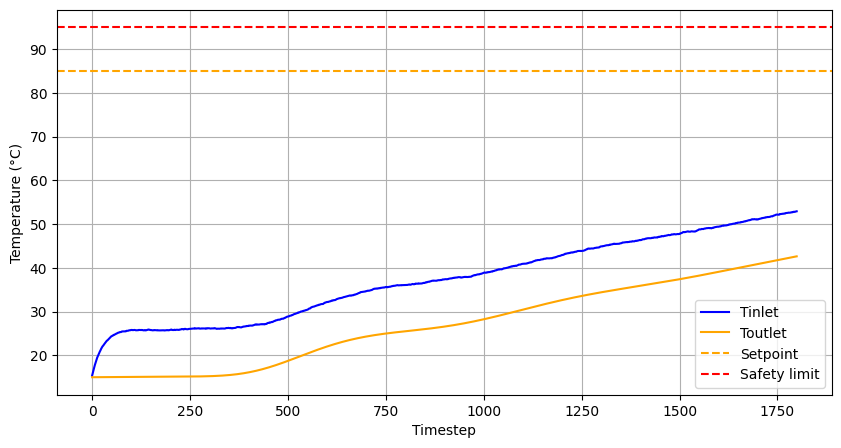

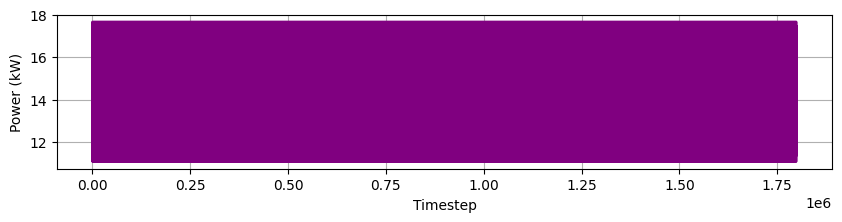

In [12]:
obs, _ = env.reset()
Tin_hist, Tout_hist, P_hist = [], [], []

for _ in range(env.steps):
    action, _ = model.predict(obs)
    obs, reward, terminated, truncated, _ = env.step(action)
    Tin_hist.append(obs[0])
    Tout_hist.append(obs[-1])
    P_hist.append(action[0])

import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(Tin_hist, label="Tinlet", color="blue")
plt.plot(Tout_hist, label="Toutlet", color="orange")
plt.axhline(env.Tset, color="orange", linestyle="--", label="Setpoint")
plt.axhline(95, color="red", linestyle="--", label="Safety limit")
plt.ylabel("Temperature (°C)")
plt.xlabel("Timestep")
plt.legend()
plt.grid(True)

plt.figure(figsize=(10,2))
plt.plot(P_hist*1000, color="purple", label="Heater Power (kW)")
plt.ylabel("Power (kW)")
plt.xlabel("Timestep")
plt.grid(True)
plt.show()


